# Energy Data Parser
- Gets the energy data into a dataframe ready for analytics
- Does not perform any analysis or non-reversible mods

### Todo
- Convert missing cells (?) to NaN
- ~~Investigate NaT indices -- fix if possible~~
    - Times are reported in DD/MM/YYYY format. Just needed to inform `pd.read_csv` of this, set `dayfirst=True` in `read_csv`'s args.
    - Left as default (False) for illustration

### Scope for *next* notebook
- outliers
- trend analysis for bad points
- interpolate/resample for missing cells
- ???

In [1]:
# Preliminary setup
import pandas as pd
import zipfile
import os
dataname = 'household_power_consumption'
# There are c. 2.e6 rows in this file.
nskiprows = int(1.1e5)
#nskiprows = 0
readrows = int(1.e5)
#readrows = None # Comment out for smaller test load.

# Extract zip if necessary
if not os.path.isfile(dataname + '.txt'):
    zip_ref = zipfile.ZipFile('src/' + dataname +'.zip', 'r')
    zip_ref.extractall('.')
    zip_ref.close()

In [2]:
# Import into dataframe
csv_labels = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
namelist = ['date','time','active','reactive','volts','amps','sub1','sub2','sub3']

df = pd.read_csv(dataname + '.txt'
                ,delimiter=';'
                ,nrows=readrows
                ,skiprows=nskiprows
                ,header=0
                ,names=namelist
                ,parse_dates=[['date', 'time']]
                ,dayfirst=False
                #,index_col='date_time'
                )

# Record the file line number of the row, and reindex on new datetime 
df['rowno'] = df.index + 2 + nskiprows
df.set_index('date_time',inplace=True,drop=True)
df.index.rename('dtime',inplace=True)

In [3]:
# Show rows with nulls
dfnulls = df[df.isnull().any(axis=1)]
dfnulls

,active,reactive,volts,amps,sub1,sub2,sub3,rowno
dtime,,,,,,,,
2007-03-25 17:52:00,?,?,?,?,?,?,NaN,142590
2007-04-28 00:21:00,?,?,?,?,?,?,NaN,190499
2007-04-28 00:22:00,?,?,?,?,?,?,NaN,190500
2007-04-28 00:23:00,?,?,?,?,?,?,NaN,190501
2007-04-28 00:24:00,?,?,?,?,?,?,NaN,190502
2007-04-28 00:25:00,?,?,?,?,?,?,NaN,190503
2007-04-28 00:26:00,?,?,?,?,?,?,NaN,190504
2007-04-28 00:27:00,?,?,?,?,?,?,NaN,190505
2007-04-28 00:28:00,?,?,?,?,?,?,NaN,190506


In [4]:
# How many rows have a missing sample?
sum(df.isnull().any(axis=1))

3724

In [5]:
# How strict is the index, ie. what is the time difference between consecutive elements?
from collections import Counter
deltas = [d for d in map(lambda a: a[1] - a[0], zip(df.index, df.index[1:]))]
Counter(deltas)

Counter({Timedelta('0 days 00:01:00'): 99965,
         Timedelta('30 days 00:01:00'): 17,
         Timedelta('29 days 00:01:00'): 11,
         Timedelta('-266 days +00:01:00'): 1,
         Timedelta('-87 days +00:01:00'): 1,
         Timedelta('27 days 00:01:00'): 2,
         Timedelta('-236 days +00:01:00'): 1,
         Timedelta('-116 days +00:01:00'): 1})

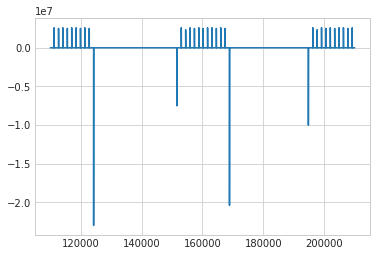

In [7]:
# Data looks like most samples are every minute
# Can we visualize where are these jumps in time?
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
ax.plot(df['rowno'][:-1], [d.total_seconds() for d in deltas])

In [8]:
# Visualization looked like a pattern occured
# Let's find out the indicies where the jumps are
import datetime
timejumps = {}
for a, b in zip(df.index, df.index[1:]):
    if b - a != datetime.timedelta(minutes=1): 
        timejumps[df['rowno'][a]] = b - a

timejumps

{111277: Timedelta('30 days 00:01:00'),
 112717: Timedelta('29 days 00:01:00'),
 114157: Timedelta('30 days 00:01:00'),
 115597: Timedelta('29 days 00:01:00'),
 117037: Timedelta('30 days 00:01:00'),
 118477: Timedelta('30 days 00:01:00'),
 119917: Timedelta('29 days 00:01:00'),
 121357: Timedelta('30 days 00:01:00'),
 122797: Timedelta('29 days 00:01:00'),
 124237: Timedelta('-266 days +00:01:00'),
 151597: Timedelta('-87 days +00:01:00'),
 153037: Timedelta('30 days 00:01:00'),
 154477: Timedelta('27 days 00:01:00'),
 155917: Timedelta('30 days 00:01:00'),
 157357: Timedelta('29 days 00:01:00'),
 158797: Timedelta('30 days 00:01:00'),
 160237: Timedelta('29 days 00:01:00'),
 161677: Timedelta('30 days 00:01:00'),
 163117: Timedelta('30 days 00:01:00'),
 164557: Timedelta('29 days 00:01:00'),
 165997: Timedelta('30 days 00:01:00'),
 167437: Timedelta('29 days 00:01:00'),
 168877: Timedelta('-236 days +00:01:00'),
 194797: Timedelta('-116 days +00:01:00'),
 196237: Timedelta('30 days 0

In [10]:
# How far apart are the jumps?
[b - a for a,b in zip(timejumps.keys(), [x for x in timejumps.keys()][1:])]

[1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 27360,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 25920,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440,
 1440]

In [38]:
# Jumps are regularly spaced for the most part
# Let's just look at one
df[df['rowno'] == list(timejumps)[23]]

,active,reactive,volts,amps,sub1,sub2,sub3,rowno
dtime,,,,,,,,
2007-04-30 23:59:00,0.356,0.142,237.800,1.600,0.000,0.000,0.0,194797


In [ ]:
# It's the last sample of the day
# The parser must be wrong!